# Part 1: Neural Network

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code

### Import data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
from IPython.display import Image
Image(url="mnist.png", width=500, height=500)

Reshape image size

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
from IPython.display import Image
Image(url="categoricallable.png", width=500, height=500)

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Visualize Data

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


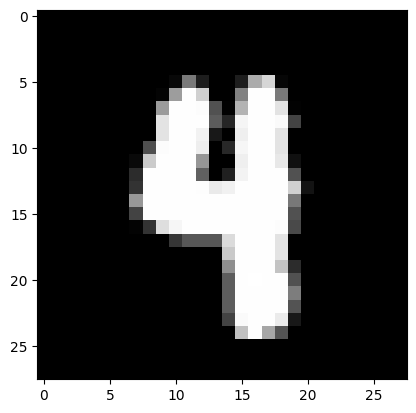

In [ ]:
print("Label:",y_test[250:251])
plt.imshow(x_test[250:251].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [ ]:
#https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning

In [ ]:
first_layer_size = 32 #Number of neuron units in first layer
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Number of parameters

Input layer = (32 units * Input dimension 784)+ Bias for 32 units = 32*784 + 32 = 25120
Hidden layer 1 = (32 units * 32 units) = 32* 32 = 1056
Hidden layer 2 = (32 units * 32 units) = 32* 32 = 1056
Output layer = (32 units * 10 units)+ Bias for 10 units = 32*10 + 10 = 330

### Weights before Training

Visualize the weight parameters initialized by the DNN model before training the model

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)

Shape of First Layer (784, 32)


Visualization of First Layer


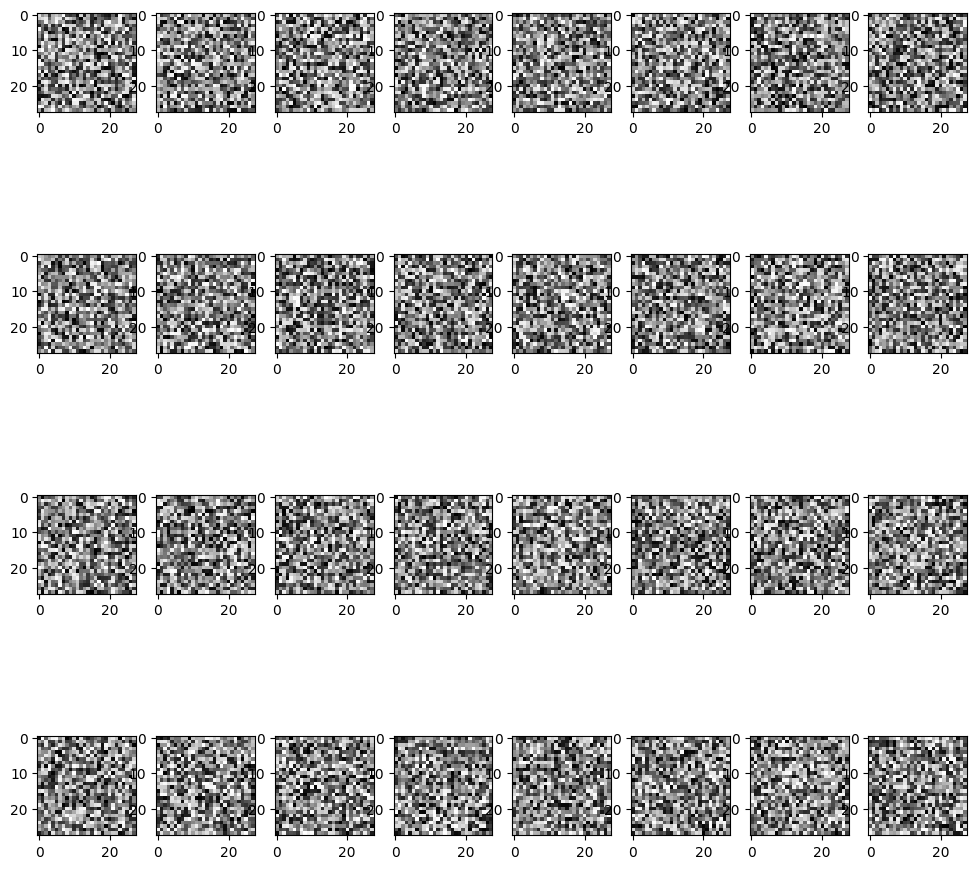

In [ ]:
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 0.4765 - accuracy: 0.8654
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2167 - accuracy: 0.9371
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1704 - accuracy: 0.9499
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1438 - accuracy: 0.9572
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1261 - accuracy: 0.9621
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1136 - accuracy: 0.9655
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1031 - accuracy: 0.9688
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0952 - accuracy: 0.9713
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9730
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0834 - accuracy: 0.9752

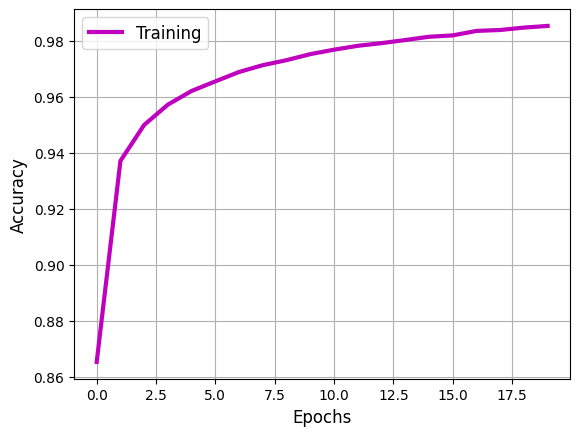

In [ ]:
# summarize history for MSE Loss
fig1 = plt.gcf()
plt.plot(history.history['accuracy'],'m-', linewidth=3)

plt.grid(True)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training'], loc='best', fontsize=12)
plt.show()

### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12425444275140762
Test accuracy: 0.9692000150680542


### Weights after Training

Visualize the learnable low level features learnt by the DNN model

Shape of First Layer (784, 32)
Visualization of First Layer


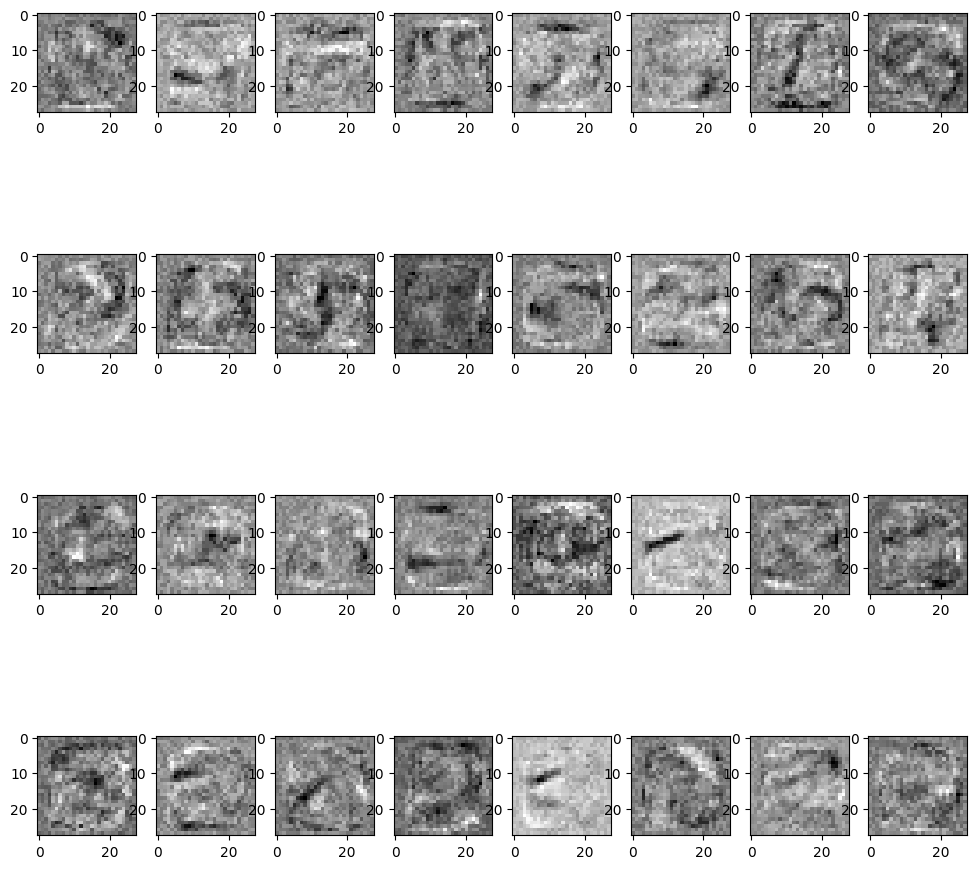

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 103ms/step
Prediction
 [1.2208977e-12 1.4490122e-11 4.5221470e-12 9.9742280e-08 7.9389363e-11
 9.9999988e-01 5.2927629e-10 1.0458365e-11 2.2098783e-09 4.1395698e-10]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


### Ground truth

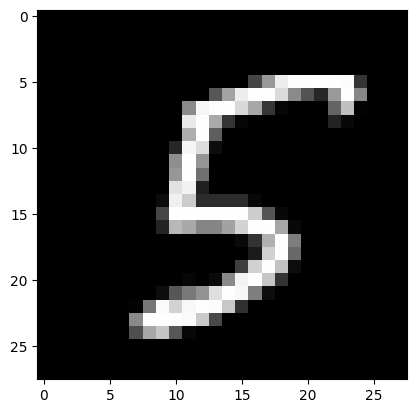

True

In [ ]:
# Write the index of the test sample to show
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()
cv2.imwrite('digit2.png',x_test[23:24].reshape(28,28))

### User Input

(28, 28)


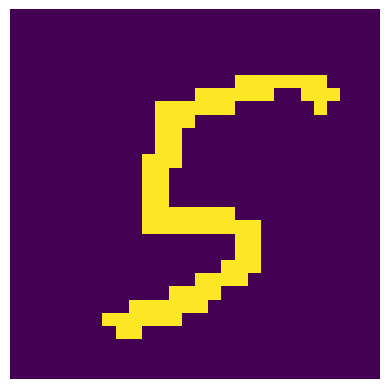

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit2.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
print(image_rgb.shape)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

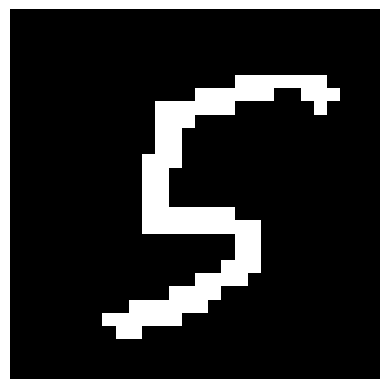

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit2.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 60ms/step
Prediction Score:
 [2.8635978e-14 3.0736587e-13 1.9473336e-13 4.9665228e-08 6.3499171e-12
 1.0000000e+00 6.6055395e-12 1.1091283e-12 3.7561820e-10 6.3176527e-11]

Thresholded Score:
 [0 0 0 0 0 1 0 0 0 0]

Predicted Digit:
 5


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.0454 - accuracy: 0.9860
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.0422 - accuracy: 0.9866
Test loss: 0.12646397948265076
Test accuracy: 0.9678999781608582


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 6280      
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.7504 - accuracy: 0.7871 - val_loss: 0.4124 - val_accuracy: 0.8865
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3847 - accuracy: 0.8938 - val_loss: 0.3397 - val_accuracy: 0.9054


### Relu Activation Function

In [ ]:
# Write your code here

# Use the same model design from the above cell

model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 6280      
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.9624 - accuracy: 0.6941 - val_loss: 0.5111 - val_accuracy: 0.8574
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4513 - accuracy: 0.8723 - val_loss: 0.3882 - val_accuracy: 0.8884


In [ ]:
# Write your code here

# Use the same model design from the above cell

model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 6280      
                                                                 
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.0395 - accuracy: 0.7498 - val_loss: 0.6505 - val_accuracy: 0.8468
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5413 - accuracy: 0.8646 - val_loss: 0.4615 - val_accuracy: 0.8783


In [ ]:
# Write your code here

# Use the same model design from the above cell

model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 6280      
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7075 - accuracy: 0.7996 - val_loss: 0.4056 - val_accuracy: 0.8838
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3930 - accuracy: 0.8884 - val_loss: 0.3524 - val_accuracy: 0.9019


In [ ]:
# Write your code here

# Use the same model design from the above cell

model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='hard_sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 8)                 6280      
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 1.5964 - accuracy: 0.5751 - val_loss: 1.2053 - val_accuracy: 0.7702
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.9750 - accuracy: 0.8073 - val_loss: 0.7723 - val_accuracy: 0.8485


### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 6280      
                                                                 
 dense_14 (Dense)            (None, 32)                288       
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 6898 (26.95 KB)
Trainable params: 6898 (26.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 4ms/step - loss: 1.8674 - accuracy: 0.5119 - val_loss: 1.3508 - val_accuracy: 0.7498
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.9935 - accuracy: 0.7824 - val_loss: 0.7289 - val_accuracy: 0.8266
Te

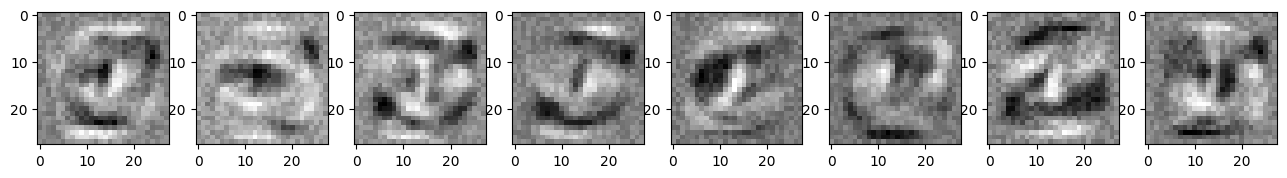

In [ ]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 4ms/step - loss: 0.9502 - accuracy: 0.7942 - val_loss: 0.4059 - val_accuracy: 0.9051
Epoch 2/2
469/469 [==============================] - 3s 7ms/step - loss: 0.3236 - accuracy: 0.9135 - val_loss: 0.2598 - val_accuracy: 0.9

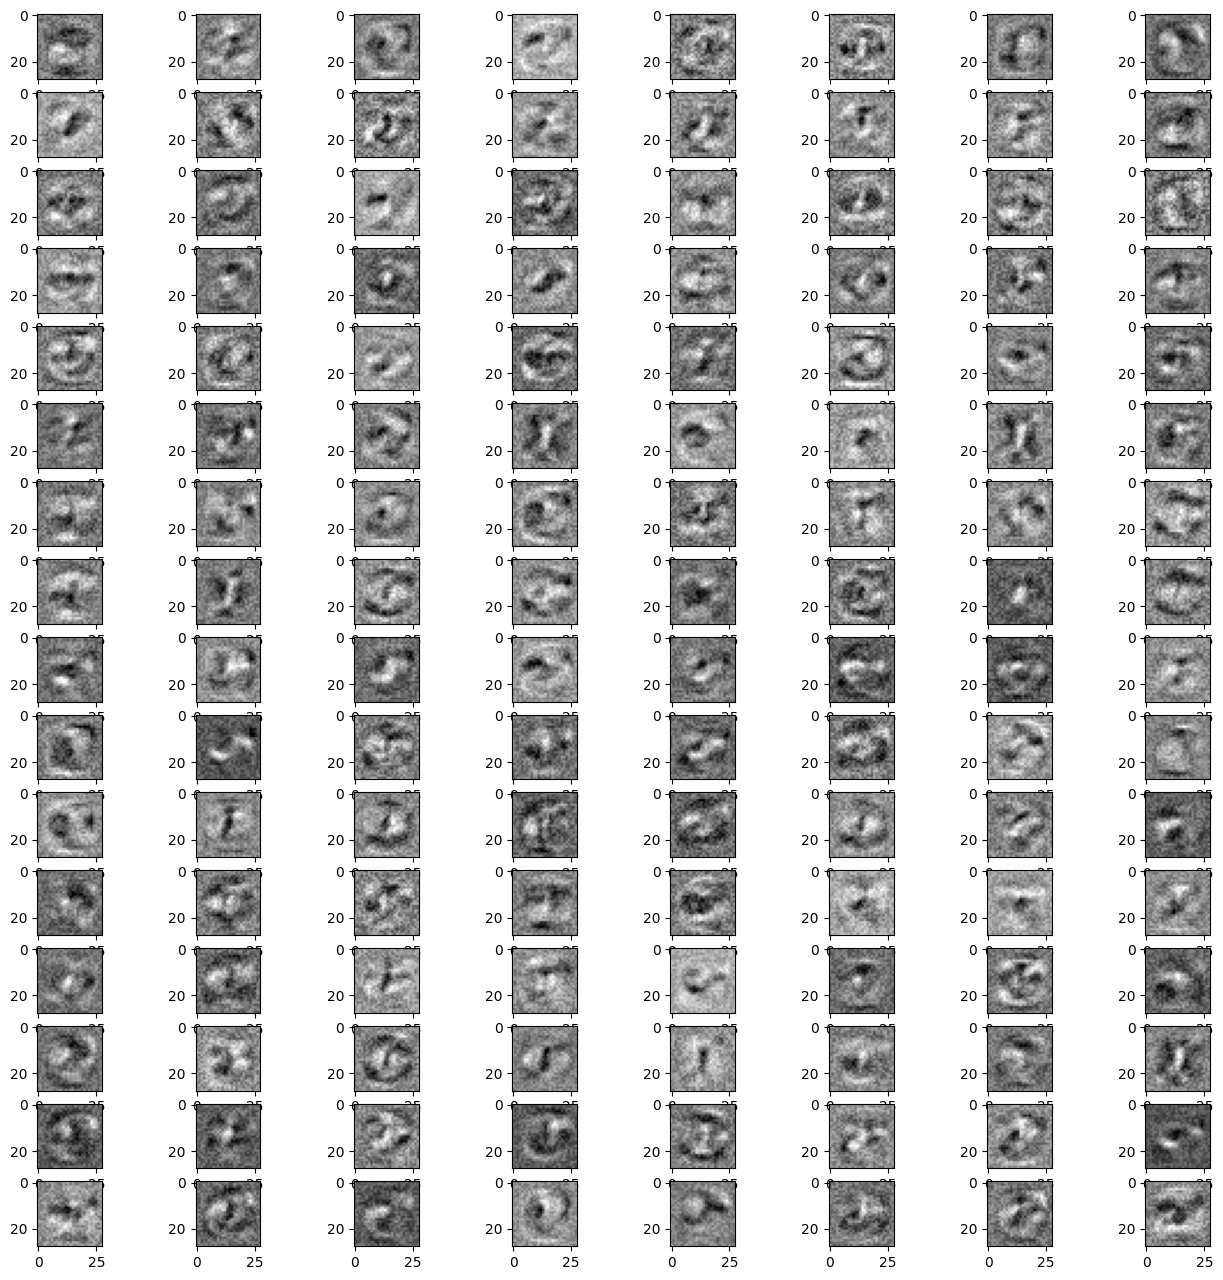

In [ ]:
# Write your code here

# Use the same layer design from the above cell

first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Lower number of Layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 8)                 6280      
                                                                 
 dense_29 (Dense)            (None, 8)                 72        
                                                                 
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 8)                 72        
                                                                 
 dense_32 (Dense)            (None, 8)                 72        
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
 dense_34 (Dense)            (None, 8)                

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here

# Use the same number of units from the above cell

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 8)                 6280      
                                                                 
 dense_50 (Dense)            (None, 8)                 72        
                                                                 
 dense_51 (Dense)            (None, 8)                 72        
                                                                 
 dense_52 (Dense)            (None, 8)                 72        
                                                                 
 dense_53 (Dense)            (None, 10)                90        
                                                                 
Total params: 6586 (25.73 KB)
Trainable params: 6586 (25.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 

### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science